---------------------------------DATA PREPROCESSING---------------------------------

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split

import datasets.data as data
from descent_algorithms import *
from models import *
from util import *

In [16]:
features, labels = data.load_wisconsin_breast_cancer()
wbc_X_train, wbc_X_test, wbc_y_train, wbc_y_test = train_test_split(
    features, labels, test_size=0.2)
# print(features.shape)
# print(labels.shape)

# print (features[0])
# print (labels)

M_features, M_labels = data.load_MNIST_13()
MNIST_X_train, MNIST_X_test, MNIST_y_train, MNIST_y_test = train_test_split(
    M_features, M_labels, test_size = 0.2)

# print(M_features.shape)
# print(M_labels.shape)

# print (M_features[0])
# print (M_labels)

cod_features, cod_labels = data.load_cod_rna()
# print(cod_features.shape)
# print(cod_labels.shape)

# print(cod_features[0])
# print(cod_labels)

cod_X_train, cod_X_test, cod_y_train, cod_y_test = train_test_split(
    cod_features, cod_labels, test_size = 0.2)

In [17]:
rel_conv = 0.000001

In [18]:
#Learning Rate Objects
lr = FixedRate(0.001)

lr1 = FixedRate(0.00001)

lr2 = FixedRate(0.0001)

In [19]:
#Descent Algorithm Objects
gd = GradientDescent()
gd1 = GradientDescent()
gd2 = GradientDescent()
# gd = StochasticVarianceReducedGradientDescent()
# gd = NesterovAcceleratedDescent()

In [20]:
#Models(descent_algo, learning rate, iterations, batch, relative convergence)
logreg = LogisticRegression(gd, lr, 25000, wbc_X_train.shape[0], rel_conv)

cod_logreg = LogisticRegression(gd1, lr1, 25000, cod_X_train.shape[0], rel_conv)

MNIST_logreg = LogisticRegression(gd2, lr2, 2500, MNIST_X_train.shape[0], rel_conv)


#Models(descent_algo, learning rate, iterations, batch, relative convergence)
# logreg = LogisticRegression(gd, lr, 16000, wbc_X_train.shape[0], rel_conv)

TypeError: __init__() takes 5 positional arguments but 6 were given

In [77]:
loss = logreg.fit(wbc_X_train, wbc_y_train)

loss_cod = cod_logreg.fit(cod_X_train, cod_y_train)

loss_MNIST = MNIST_logreg.fit(MNIST_X_train, MNIST_y_train)

Iter:        0 train loss: 375.609
Iter:      800 train loss: 221.336
Iter:     1600 train loss: 217.210
Iter:     2400 train loss: 216.413
Convergence in 2908 iterations


In [14]:
#modelAccuracyCheck
acc = check_accuracy(logreg, wbc_X_test, wbc_y_test)
print("Model Accuracy: {0:.2f}%".format(acc * 100))

acc = check_accuracy(cod_logreg, cod_X_test, cod_y_test)
print("Model Accuracy: {0:.2f}%".format(acc * 100))

acc = check_accuracy(MNIST_logreg, MNIST_X_test, MNIST_y_test)
print("Model Accuracy: {0:.2f}%".format(acc * 100))



Model Accuracy: 90.71%
Model Accuracy: 87.68%
Model Accuracy: 99.18%


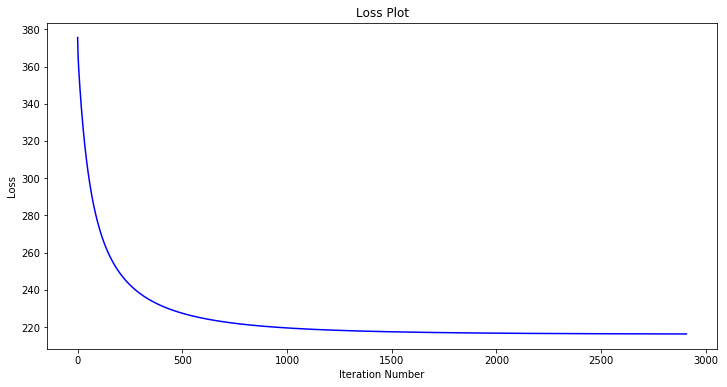

In [79]:
import matplotlib.pyplot as plt
# plt.figure(200)
# plt.title('Training Accuracy')
# plt.xlabel('Iteration x10^2')
# plt.ylabel('Accuracy')
# plt.plot(accuracies, 'b')
# plt.show()
# plt.figure(300)
# plt.title('Validation Accuracy')
# plt.xlabel('Iteration x10^2')
# plt.ylabel('Accuracy')
# plt.plot(val_accuracies, 'b')
# plt.show()
plt.figure(1, figsize=(12, 6))
plt.title('Loss Plot')
plt.xlabel('Iteration Number')
plt.ylabel('Loss')
plt.plot(loss, 'b')
plt.show()